In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=df.iloc[:,[2,3]].values # 1. age  2. Annual income
X

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

In [5]:
from sklearn.cluster import KMeans

In [6]:
km=KMeans(n_clusters=3)

In [7]:
km.fit(X)

KMeans(n_clusters=3)

In [8]:
km.inertia_ 

59486.961439280356

In [9]:
km.cluster_centers_

array([[55.03448276, 50.34482759],
       [28.36      , 31.44      ],
       [34.34782609, 82.82608696]])

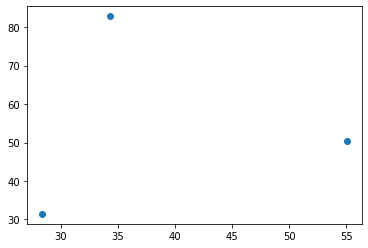

In [10]:
import matplotlib.pyplot as plt
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [11]:
# Elbow method
WCSS=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    WCSS.append(km.inertia_)

In [12]:
WCSS

[176108.77999999997,
 87121.56591478694,
 59486.961439280356,
 39529.887967363524,
 31659.353138717805,
 25399.022004416987,
 21885.502478896775,
 18850.694236178268,
 15993.235556656886,
 13773.407736691872]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

(1.0, 10.0)

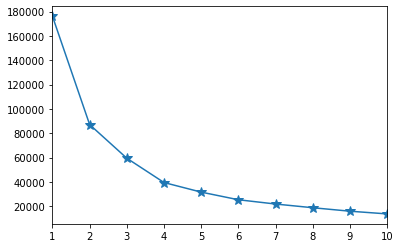

In [14]:
plt.plot(range(1,11),WCSS,marker='*',markersize=10)
plt.xlim(1,10)

In [15]:
km=KMeans(n_clusters=4)

In [16]:
Y_predict=km.fit_predict(X)
Y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

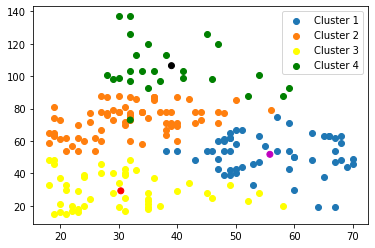

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[Y_predict==0,0],X[Y_predict==0,1],label='Cluster 1')
plt.scatter(X[Y_predict==1,0],X[Y_predict==1,1],label ='Cluster 2')
plt.scatter(X[Y_predict==2,0],X[Y_predict==2,1],c='yellow',label='Cluster 3')
plt.scatter(X[Y_predict==3,0],X[Y_predict==3,1],c='green',label='Cluster 4')
#plt.scatter(X[Y_predict==4,0],X[Y_predict==4,1],label='Cluster 5')
#plt.scatter(X[Y_predict==5,0],X[Y_predict==5,1],label ='Cluster 6')
#plt.scatter(X[Y_predict==6,0],X[Y_predict==6,1],c='yellow',label='Cluster 7')
#plt.scatter(X[Y_predict==7,0],X[Y_predict==7,1],c='green',label='Cluster 8')
#plt.scatter(X[Y_predict==4,0],X[Y_predict==4,1],c='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c=['m','g','r','k',])#'y','k','c','k']) #for centroid
plt.legend()

In [18]:
km.cluster_centers_[:] #centroid values

array([[ 55.81481481,  51.77777778],
       [ 31.95890411,  72.95890411],
       [ 30.34693878,  29.26530612],
       [ 39.        , 106.5       ]])

In [19]:
km.cluster_centers_[:,1]

array([ 51.77777778,  72.95890411,  29.26530612, 106.5       ])

In [20]:
km.score(X)

-39529.887967363524

In [21]:
km.predict([[31,50]])

array([2])

In [22]:
km.cluster_centers_[:][3]

array([ 39. , 106.5])

In [23]:
km.score(X)

-39529.887967363524

In [24]:
# how to measure the accuracy of KMeans clustering algorithm???
# do we have loss function in KMeans?
# Elbow method and silhouette method